# Result Analysis

In [1]:
import os
import sys
import pandas as pd

# Get the absolute path to the src directory
src_path = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Add src_path to the system path
sys.path.insert(0, src_path)

# Now you can import your module
import scripts.graph_utils as gru

### Load Data

In [2]:
# Data path directory
RESULTS_PATH = "../../results/"
NETWORKS_PATH = "../../data/"
IMAGES_PATH = "../../img/motifs_4/"

In [3]:
# Load data
def load_data(file):
    data = pd.read_csv(RESULTS_PATH + file)
    return data

## Twitter Egonets

In [4]:
# Load the Twitter data
file_name = "twitter_motifs_4_graph.csv"
motif_twitter = load_data(file_name)
# cast graph_name as string
motif_twitter["graph_name"] = motif_twitter["graph_name"].astype(str)

In [5]:
motif_twitter

,graph_name,motif,average_count,standard_deviation,z_score,significance_profile,nodes,edges,max_degree,avg_degree
0,14338082_sample_sff_15,claw1,106.12,29.216605,3.829329,0.068822,32.0,397.0,24.0,24.812500
1,14338082_sample_sff_15,claw2,236.00,53.909647,-1.966253,-0.035338,32.0,397.0,24.0,24.812500
2,14338082_sample_sff_15,claw3,172.12,44.531188,-0.676380,-0.012156,32.0,397.0,24.0,24.812500
3,14338082_sample_sff_15,claw4,47.20,13.859413,0.995713,0.017895,32.0,397.0,24.0,24.812500
4,14338082_sample_sff_15,claw5,105.72,34.458332,12.138719,0.218162,32.0,397.0,24.0,24.812500
...,...,...,...,...,...,...,...,...,...,...
535,100318079_sample_rpn_15,claw5,7.20,4.000000,3.950000,0.401217,23.0,274.0,17.0,23.826087
536,100318079_sample_rpn_15,claw6,11.80,3.905125,3.380174,0.343338,23.0,274.0,17.0,23.826087
537,100318079_sample_rpn_15,claw7,5.16,4.561433,3.691823,0.374993,23.0,274.0,17.0,23.826087
538,100318079_sample_rpn_15,claw8,3.48,2.485290,5.037641,0.511694,23.0,274.0,17.0,23.826087


### Twitter Original Egonets

In [6]:
# # Plot only the original graphs of Twitter
# gru.plot_line_chart_with_images(
#     motif_twitter[~motif_twitter["graph_name"].str.contains("sample")],
#     f"Z-scores for Twitter Original Graphs from {file_name}",
#     "motif",
#     "significance_profile",
#     IMAGES_PATH
# )

In [7]:
motif_twitter.query(
    "graph_name.str.contains('sample') == False and motif == 'motif_1'"
)[["graph_name", "nodes", "edges", "max_degree", "avg_degree"]].sort_values("nodes")

,graph_name,nodes,edges,max_degree,avg_degree


## Twitter Samples

In [8]:
sample_percents = ["20", "15", "10"]

selected_graph = "7861312"

for sp in sample_percents:
    # Query data
    query_df = motif_twitter.query(
        "graph_name == @selected_graph or (graph_name.str.startswith(@selected_graph) and graph_name.str.endswith(@sp))",
    )

    gru.plot_line_chart_with_images(
        query_df,
        f"Z-scores for Twitter Generated Samples of {selected_graph}",
        "motif",
        "significance_profile",
        IMAGES_PATH
    )

    print(
        query_df[["graph_name", "motif", "nodes", "edges"]].query("motif == 'claw1'")
    )

                graph_name  motif  nodes  edges
27   7861312_sample_sff_20  claw1   44.0  415.0
36   7861312_sample_rpn_20  claw1   37.0  289.0
63    7861312_sample_rw_20  claw1   44.0  407.0
189   7861312_sample_rn_20  claw1   39.0  178.0


                graph_name  motif  nodes  edges
144   7861312_sample_rn_15  claw1   32.0   89.0
216   7861312_sample_rw_15  claw1   33.0  215.0
252  7861312_sample_sff_15  claw1   33.0  364.0
405  7861312_sample_rpn_15  claw1   25.0  101.0


                graph_name  motif  nodes  edges
9    7861312_sample_rpn_10  claw1   18.0   80.0
54   7861312_sample_sff_10  claw1   22.0   88.0
261   7861312_sample_rw_10  claw1   22.0  127.0
414   7861312_sample_rn_10  claw1   20.0   81.0


In [9]:
sample_percents = ["20", "15", "10"]

selected_graph = "14203895"

for sp in sample_percents:
    # Query data
    query_df = motif_twitter.query(
        "graph_name == @selected_graph or (graph_name.str.startswith(@selected_graph) and graph_name.str.endswith(@sp))",
    )

    gru.plot_line_chart_with_images(
        query_df,
        f"Z-scores for Twitter Generated Samples of {selected_graph}",
        "Motifs",
        "significance_profile",
        IMAGES_PATH
    )

    print(
        query_df[["graph_name", "motif", "nodes", "edges"]].query("motif == 'claw1'")
    )

                 graph_name  motif  nodes  edges
18    14203895_sample_rw_20  claw1   42.0  425.0
108   14203895_sample_rn_20  claw1   41.0  186.0
126  14203895_sample_rpn_20  claw1   34.0  309.0
297  14203895_sample_sff_20  claw1   43.0  689.0


                 graph_name  motif  nodes  edges
81   14203895_sample_rpn_15  claw1   18.0   96.0
270   14203895_sample_rw_15  claw1   32.0  270.0
360  14203895_sample_sff_15  claw1   32.0  225.0
441   14203895_sample_rn_15  claw1   25.0   74.0


                 graph_name  motif  nodes  edges
207  14203895_sample_rpn_10  claw1   17.0   43.0
315   14203895_sample_rn_10  claw1   16.0   31.0
387  14203895_sample_sff_10  claw1   21.0  192.0
423   14203895_sample_rw_10  claw1   21.0  122.0


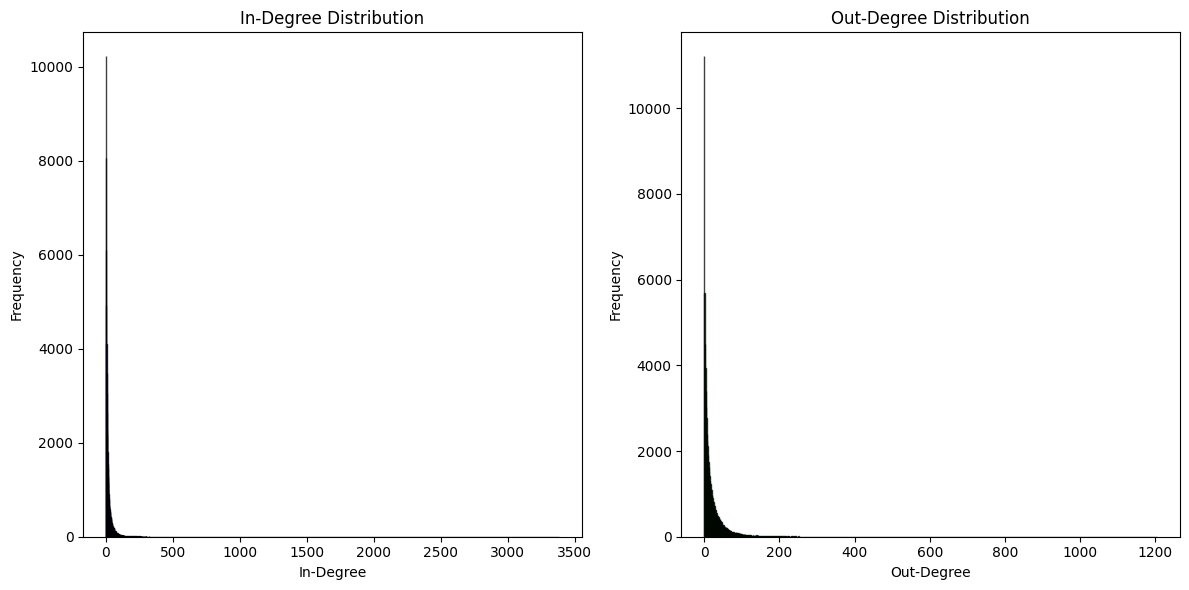

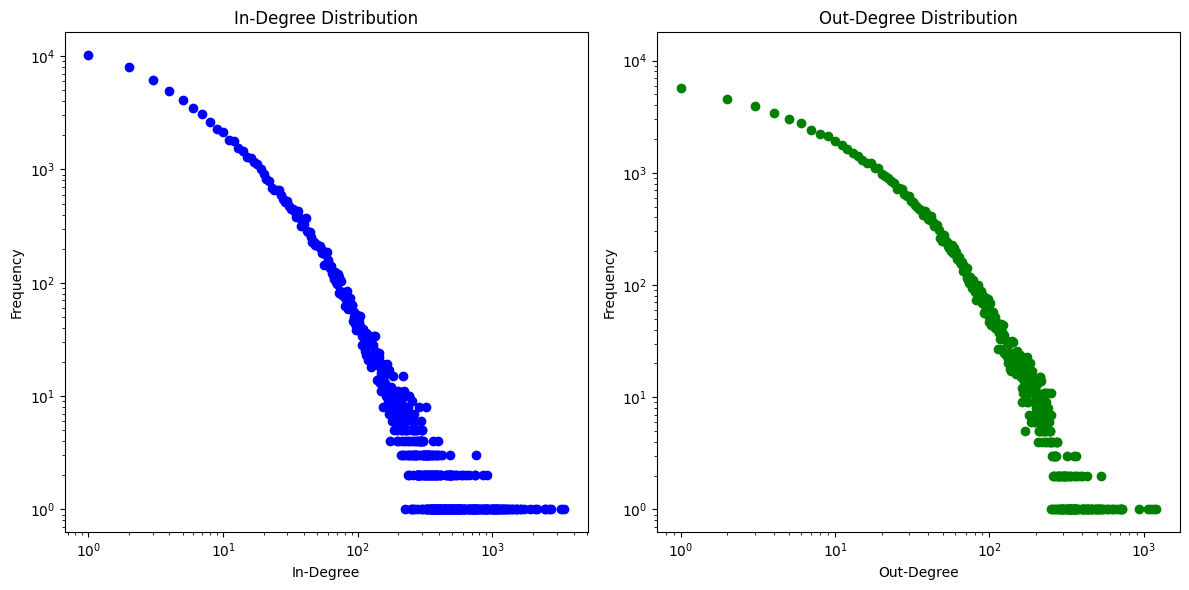

In [10]:
twitter_combined = gru.read_directed_graph_from_edge_list(
    "../../data/tests/twitter_combined.edges"
)
gru.plot_degree_distribution(twitter_combined)
gru.plot_degree_distribution_scatter(twitter_combined)

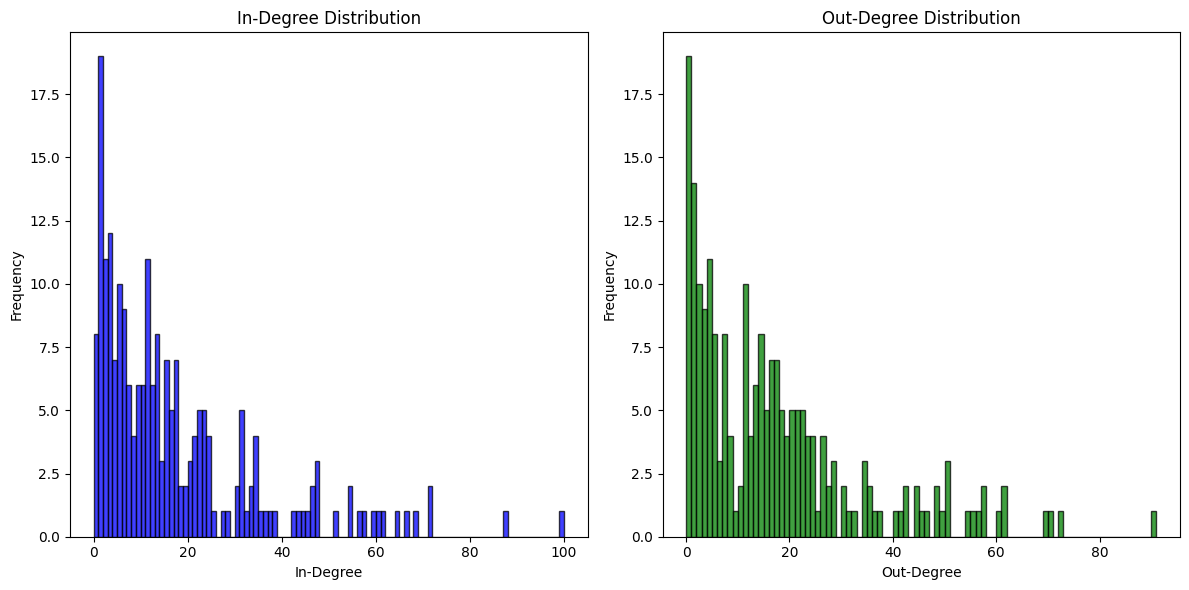

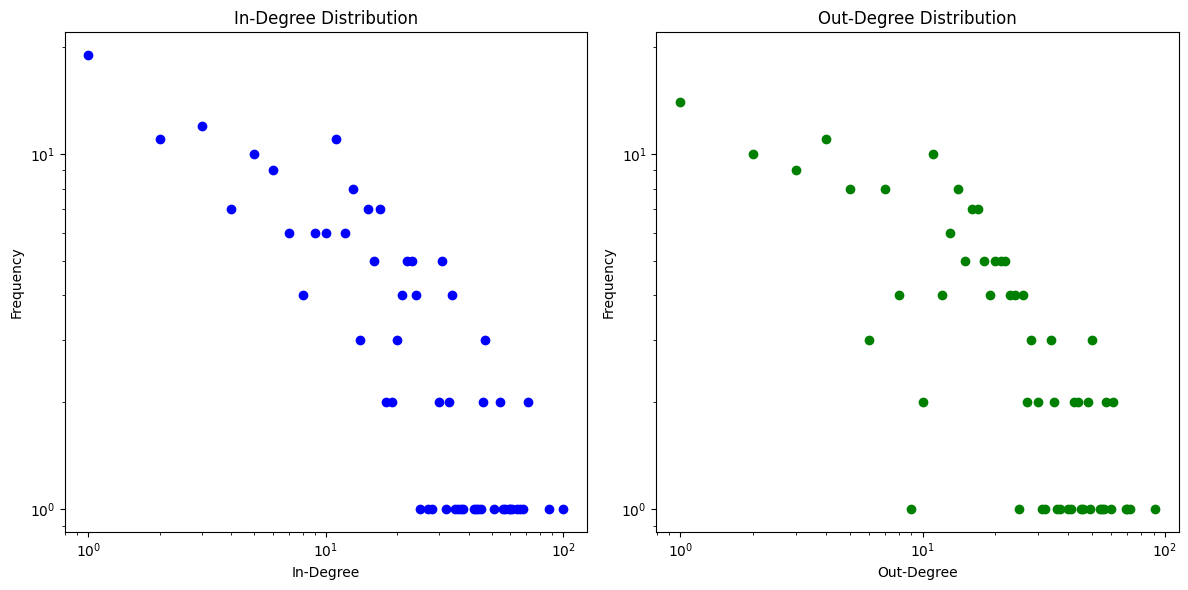

In [11]:
twitter_ego = gru.read_directed_graph_from_edge_list(
    "../../data/twitter/14203895.edges"
)
gru.plot_degree_distribution(twitter_ego)
gru.plot_degree_distribution_scatter(twitter_ego)

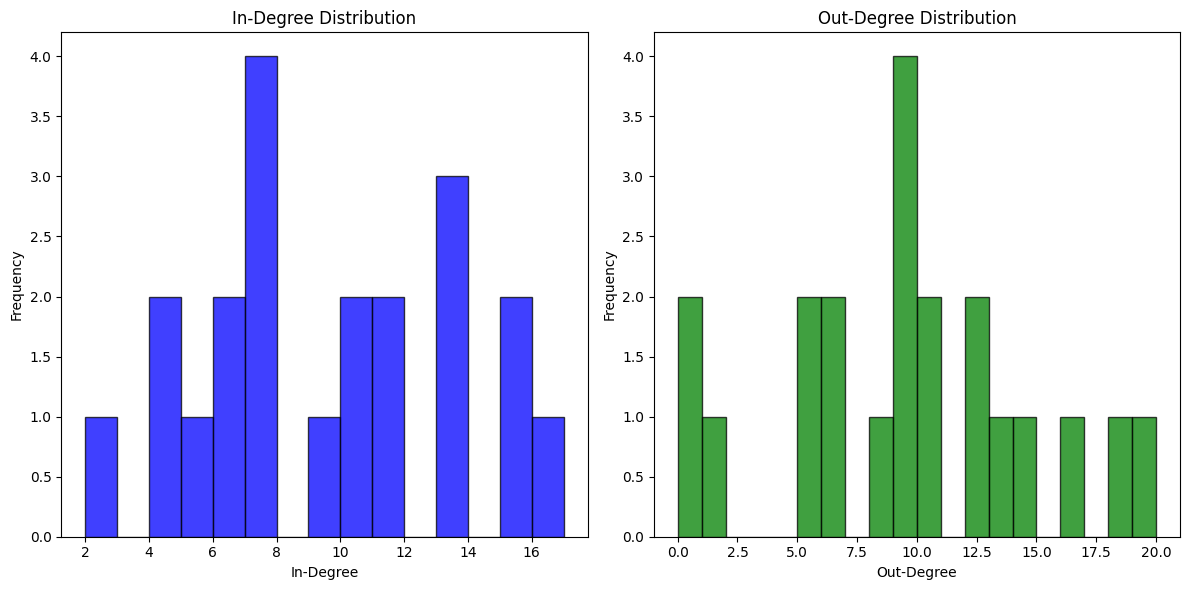

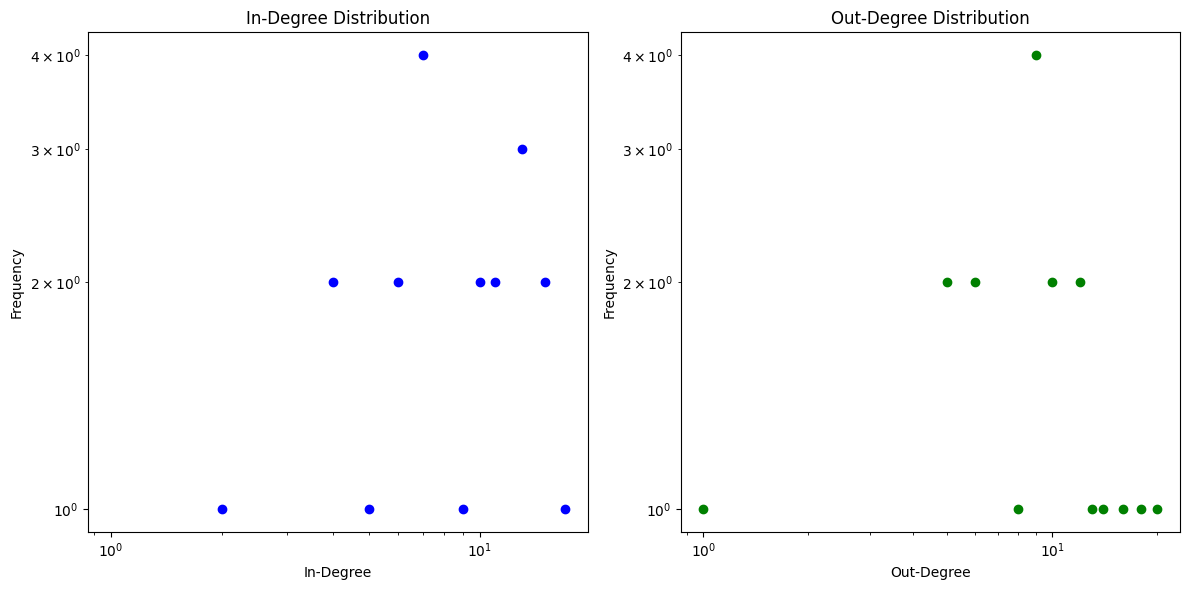

In [12]:
twitter_ssf_10 = gru.read_directed_graph_from_edge_list(
    "../../data/twitter_samples/14203895_sample_sff_10.edges"
)
gru.plot_degree_distribution(twitter_ssf_10)
gru.plot_degree_distribution_scatter(twitter_ssf_10)